Моделируемое уравнение: $\dot{\phi}_j = \displaystyle\frac{\mu}{2} \Big[ \omega_j + \displaystyle\frac{d}{R_j}\sum_{k=1}^N{R_k(\sin(\phi_k-\phi_j-\gamma))} \Big], \quad j\neq k$


In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from numba import jit
from pprint import pprint

In [2]:
# Параметры системы
N = 128
mu = 0.1
d = 0.3
omega = np.ones(N)
R = np.ones(N)
gamma = 3*np.pi/4

## Система

In [3]:
@jit(nopython=True)
def system(phi, t, N, mu, omega, gamma, d, R):
    result = np.zeros_like(phi)

    for j in range(N):
        sum_term = 0.0
        for k in range(N):
            if j != k:
                sum_term += R[k] * np.sin(phi[k] - phi[j] - gamma)

        result[j] = mu / 2 * (omega[j] + d / R[j] * sum_term)

    return result


phi0 = 2 * np.pi * np.random.rand(N)

t_span = np.linspace(0, 1000, 1000)

solution = odeint(system, phi0, t_span, args=(N, mu, omega, gamma, d, R))

# приведение к [0, 2пи]
solution = np.fmod(solution, 2*np.pi)
# 0 и 2пи на окружности одна точка
solution[solution == 2*np.pi] -= 2*np.pi
# отрицательные привели к [0, 2пи]
solution[solution < 0] += 2*np.pi

pprint(solution)

array([[3.73855503, 2.73597339, 2.3808953 , ..., 3.15172093, 4.88220667,
        3.60528589],
       [3.67762051, 2.70468137, 2.38285006, ..., 3.09456022, 4.92527685,
        3.54147516],
       [3.6973891 , 2.70513686, 2.38912029, ..., 3.09614743, 5.01734962,
        3.55540089],
       ...,
       [1.24971019, 0.21347019, 6.16953291, ..., 0.62144095, 2.59295306,
        1.10168492],
       [1.31037746, 0.27413746, 6.23020018, ..., 0.68210822, 2.65362033,
        1.16235219],
       [1.37104473, 0.33480473, 0.00768214, ..., 0.74277549, 2.7142876 ,
        1.22301946]])


## Параметры порядка:

$R_1=\displaystyle \frac{1}{N}\Big|\sum^N_{j=1}e^{i\phi_j}\Big|$

$R_2=\displaystyle \frac{1}{N}\Big|\sum^N_{j=1}e^{2i\phi_j}\Big|$

Final values of R1 and R2:
R1: 1.2978699771586081e-15
R2: 0.04691026299452613


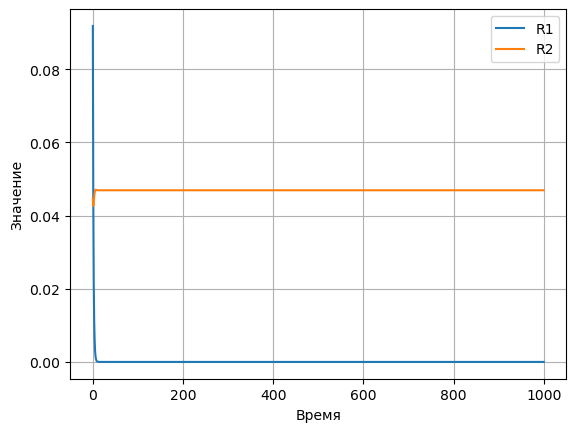

In [4]:
R1 = np.abs(np.mean(np.exp(1j * solution[:, :]), axis=1))
R2 = np.abs(np.mean(np.exp(2j * solution[:, :]), axis=1))

print("Final values of R1 and R2:")
print(f"R1: {R1[-1]}")
print(f"R2: {R2[-1]}")

with open("R1.txt", "a") as file:
    # Записать данные в файл
    file.write(f"{R1[-1]}\n")
with open("R2.txt", "a") as file:
    # Записать данные в файл
    file.write(f"{R2[-1]}\n")
    
# Построение графиков параметров порядка
plt.plot(t_span, R1, label='R1')
plt.plot(t_span, R2, label='R2')
plt.grid(True)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

## Пространственно-временная диаграмма

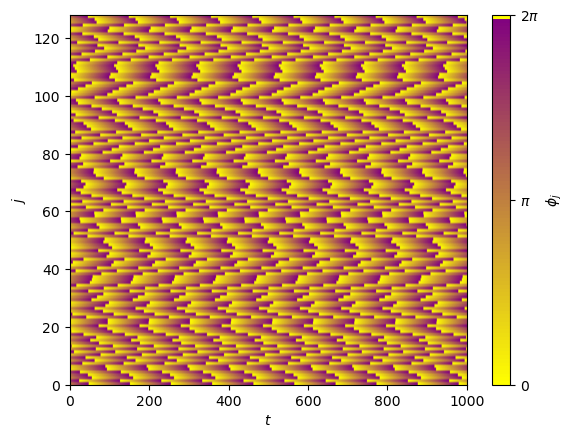

In [5]:
# Создание цветовой карты
colors = ['#FFFF00', '#800080']
n_bins = 100  # Количество оттенков

# 0 и 2*pi одним цветом
color_map_values = np.linspace([1, 1, 0], [128/255, 0, 128/255], n_bins)
color_map_values[0, :] = color_map_values[-1, :] = [1, 1, 0]

cmap_name = "custom_gradient"
custom_cmap = ListedColormap(color_map_values)

# Построение пространственно-временной диаграммы с градиентом цветовой карты
fig, ax = plt.subplots()
im = ax.imshow(solution.T, aspect='auto', cmap=custom_cmap, extent=[
               t_span[0], t_span[-1], 0, N], vmin=0, vmax=2*np.pi)
cb = plt.colorbar(im, ax=ax, label=fr'$\phi_j$', ticks=[0, np.pi, 2*np.pi])
cb.set_ticklabels(['$0$', '$\pi$', '$2\pi$'])

plt.xlabel(fr'$t$')
plt.ylabel(fr'$j$')
plt.show()

## Распределение осцилляторов

final time

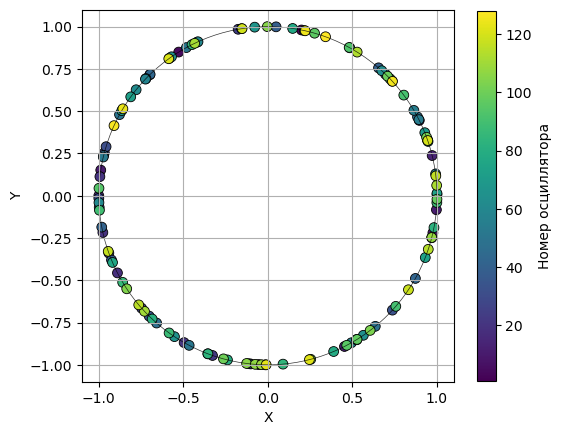

In [6]:
theta = solution[-1, :]

x = np.cos(theta)
y = np.sin(theta)

fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(x, y, c=range(1, N+1), cmap='viridis', s=50, edgecolor='black', linewidth=0.6)
ax.set_aspect('equal', 'box')

circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=0.5, alpha=0.8)
ax.add_patch(circle)
ax.grid()

cbar = plt.colorbar(sc, shrink=0.8)
cbar.set_label('Номер осциллятора')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()